# Semantic Segmentation for Around View Monitoring System

## packages

In [1]:
import cv2, os
import numpy as np
import time
import matplotlib.pyplot as plt
from modules import sementic_segmentation

## initialization

In [2]:
# module initialization
model_path = './models/model_v1_0.pb'
ss = sementic_segmentation.avm_ss(model_path)
images_directory = './library/frameset1'
image_files = sorted([os.path.join(images_directory, file) for file in os.listdir(images_directory) if file.endswith(('.jpg', '.png', '.jpeg'))])

[avm_ss] model graphs are built


## inference

100
showing resolution: (160, 120)
end loop  0
end loop  5
end loop  10
end loop  15
end loop  20
end loop  25
end loop  30
end loop  35
end loop  40
end loop  45
end loop  50
end loop  55
end loop  60
end loop  65
end loop  70
end loop  75
end loop  80
end loop  85
end loop  90
end loop  95
before reformat [1.5629980564117432, 0.13700056076049805, 0.11900019645690918, 0.1230020523071289, 0.11899924278259277, 0.12800025939941406, 0.1289994716644287, 0.13700032234191895, 0.1269981861114502, 0.140000581741333, 0.127000093460083, 0.13700008392333984, 0.13299989700317383, 0.12799954414367676, 0.1249997615814209, 0.12800073623657227, 0.1379997730255127, 0.13699984550476074, 0.12999892234802246, 0.13000059127807617, 0.1249995231628418, 0.13200020790100098, 0.1249997615814209, 0.12800121307373047, 0.12299847602844238, 0.13000035285949707, 0.1359999179840088, 0.12599992752075195, 0.13399910926818848, 0.13099980354309082, 0.12900114059448242, 0.13099980354309082, 0.1360001564025879, 0.125998973

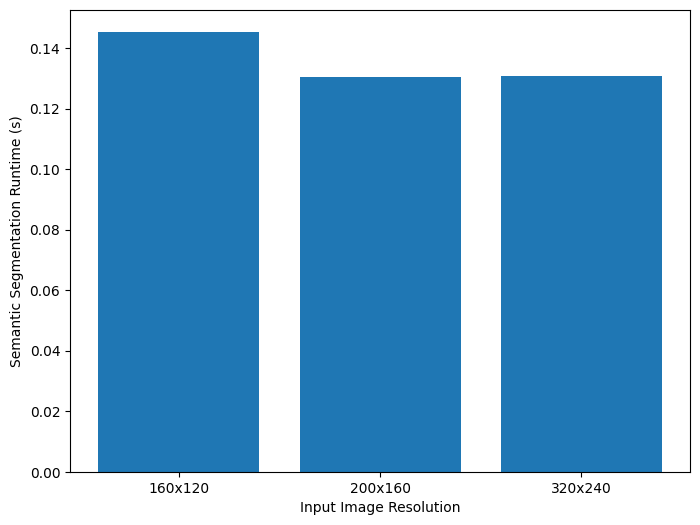

In [3]:
resolutions = [
    (160, 120),
    (200, 160),
    (320, 240)  
]

time_data = []
MAX_FRAMES =  len(image_files)
print(MAX_FRAMES)
for resolution in resolutions:
    print('showing resolution:', resolution)
    
    total_time = time.time()
    start_time = time.time()
    frame_count = 0
    frame_num = 0
    
    # Process each image, perform inference, and add to the video
    for img_name in image_files:
        img = cv2.imread(img_name)
        time1 = time.time()
        output = ss.run(img)
        processed_img = output['img_overlay']
        time2 = time.time()
        time_data.append(time2 - time1)
        if frame_num % 5 == 0:
            print("end loop ", frame_num)
        frame_num += 1
    
    #after while loop, consolidate time_data for last max_frames
    print("before reformat", time_data)
    time_data[-1 * MAX_FRAMES:] = [sum (time_data[-1 * MAX_FRAMES:]) / MAX_FRAMES]
    print("after reformat", time_data)

resolution_labels = [f"{res[0]}x{res[1]}" for res in resolutions]
plt.figure(figsize=(8, 6))
plt.bar(resolution_labels, time_data)
plt.xlabel('Input Image Resolution')
plt.ylabel('Semantic Segmentation Runtime (s)')
plt.show()

